In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in Data

In [5]:
!ls data

GHCND_documentation.pdf        historical-hourly-weather-data
NOAA_weather_data.csv          monthly_total_by_precinct.csv
NYPD_Crime                     non_anomalies
Police Precincts               non_anomalies.csv
Police Precincts.geojson       ny_weather.csv
central_park_temp_precip.csv   precinct_agg_season.csv
crime_2014_2017.csv            precincts.json
fouryear.csv


In [32]:
weather = pd.read_csv('data/central_park_temp_precip.csv')
crime = pd.read_csv('data/non_anomalies.csv')

In [33]:
crime.head()

,date,complaint_count
0,2014-01-30,1268.0
1,2014-01-31,1395.0
2,2014-02-02,1276.0
3,2014-02-03,1091.0
4,2014-02-04,1174.0


### Convert Date Columns to Datetime

In [34]:
weather['date'] = pd.to_datetime(weather.date)
crime['date'] = pd.to_datetime(crime.date
                              )

In [35]:
weather.head()

,Unnamed: 0,index,date,precipitation,snow_fall,snow_accum,max_temp,min_temp
0,0,0,2012-01-01,0.05,0.0,0.0,52,41
1,1,1,2012-01-02,0.00,0.0,0.0,50,33
2,2,2,2012-01-03,0.00,0.0,0.0,33,15
3,3,3,2012-01-04,0.00,0.0,0.0,27,13
4,4,4,2012-01-05,0.00,0.0,0.0,40,27


In [36]:
crime.head()

,date,complaint_count
0,2014-01-30,1268.0
1,2014-01-31,1395.0
2,2014-02-02,1276.0
3,2014-02-03,1091.0
4,2014-02-04,1174.0


In [37]:
crime_date = crime

In [38]:
date_crime_temp = pd.merge(left=crime_date, right=weather, how='left', on='date')

In [39]:
date_crime_temp.shape

(1403, 9)

In [40]:
date_crime_temp.head()

,date,complaint_count,Unnamed: 0,index,precipitation,snow_fall,snow_accum,max_temp,min_temp
0,2014-01-30,1268.0,760,760,0.00,0.0,1.0,30,16
1,2014-01-31,1395.0,761,761,0.00,0.0,1.2,39,25
2,2014-02-02,1276.0,763,763,0.00,0.0,1.2,56,39
3,2014-02-03,1091.0,764,764,1.17,8.0,1.2,43,27
4,2014-02-04,1174.0,765,765,0.00,0.0,7.9,35,22


In [41]:
date_crime_temp = date_crime_temp[['date', 'complaint_count', 'max_temp']]
#date_crime_temp.rename(columns=({'complaint_date': 'complaint_count'}), inplace=True)
date_crime_temp.head()

,date,complaint_count,max_temp
0,2014-01-30,1268.0,30
1,2014-01-31,1395.0,39
2,2014-02-02,1276.0,56
3,2014-02-03,1091.0,43
4,2014-02-04,1174.0,35


In [42]:
date_crime_temp['day'] = date_crime_temp.date.dt.day
date_crime_temp['day of week'] = date_crime_temp.date.dt.dayofweek
date_crime_temp['month'] = date_crime_temp.date.dt.month
date_crime_temp['year'] = date_crime_temp.date.dt.year


date_crime_temp.tail()

,date,complaint_count,max_temp,day,day of week,month,year
1398,2017-12-26,912.0,28,26,1,12,2017
1399,2017-12-27,939.0,24,27,2,12,2017
1400,2017-12-28,905.0,18,28,3,12,2017
1401,2017-12-29,895.0,22,29,4,12,2017
1402,2017-12-30,840.0,23,30,5,12,2017


In [43]:
date_crime_temp.corr()

,complaint_count,max_temp,day,day of week,month,year
complaint_count,1.000000,0.626548,-0.098741,0.020618,0.149186,-0.212409
max_temp,0.626548,1.000000,0.031625,-0.020218,0.260988,-0.006776
day,-0.098741,0.031625,1.000000,0.002018,-0.012905,-0.008360
day of week,0.020618,-0.020218,0.002018,1.000000,0.002592,0.003890
month,0.149186,0.260988,-0.012905,0.002592,1.000000,-0.049331
year,-0.212409,-0.006776,-0.008360,0.003890,-0.049331,1.000000


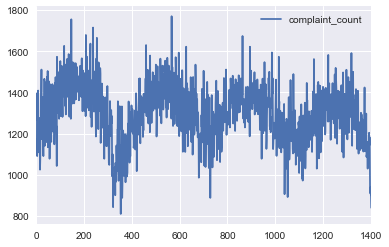

In [44]:
date_crime_temp[['complaint_count']].plot()

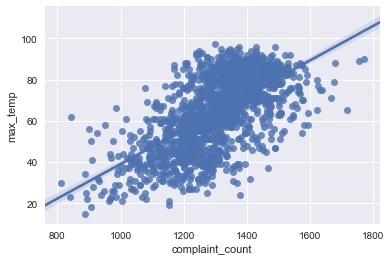

In [45]:
#plt.plot(date_crime_temp.CMPLNT_NUM, date_crime_temp.max_temp, '*')
sns.regplot(date_crime_temp.complaint_count, date_crime_temp.max_temp)

In [46]:
date_crime_temp.shape[0]*0.8

1122.4

In [47]:
date_crime_temp.set_index('date', inplace=True)
date_crime_temp.head()

,complaint_count,max_temp,day,day of week,month,year
date,,,,,,
2014-01-30,1268.0,30,30,3,1,2014
2014-01-31,1395.0,39,31,4,1,2014
2014-02-02,1276.0,56,2,6,2,2014
2014-02-03,1091.0,43,3,0,2,2014
2014-02-04,1174.0,35,4,1,2,2014


In [64]:
train = date_crime_temp.iloc[:1122]

test = date_crime_temp.iloc[1123:]

In [65]:
len(test)

280

In [66]:
from statsmodels.tsa.stattools import adfuller
adfuller(train.complaint_count)

(-2.289632931668914,
 0.17533336058471777,
 19,
 1102,
 {'1%': -3.4362979108111977,
  '5%': -2.8641662931725675,
  '10%': -2.5681683203283256},
 13139.67500652085)

In [67]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

# Iterate through all possible differences.
for d in range(1, len(train.complaint_count)):
    
    # Print out a counter and the corresponding p-value.
    print(f'Checking difference of {d}.')
    print(f'p-value = {interpret_dftest(adfuller(train.complaint_count.diff(d).dropna()))["p-value"]}.')
          
    # If our data, differenced by d time periods, are stationary, print that out!
    if interpret_dftest(adfuller(train.complaint_count.diff(d).dropna()))['p-value'] < 0.05:
        print(f'Differencing our time series by d={d} yields a stationary time series!')
        break
    
    print()

Checking difference of 1.
p-value = 3.5322250517762637e-22.
Differencing our time series by d=1 yields a stationary time series!


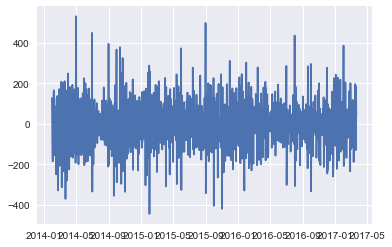

In [68]:
plt.plot(train.complaint_count.diff(1))

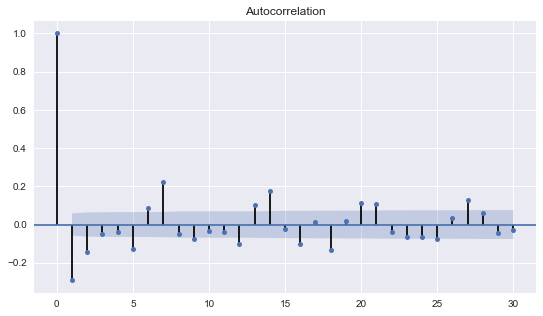

In [69]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_acf(train.complaint_count.diff(1).dropna(), lags=30, ax=ax);

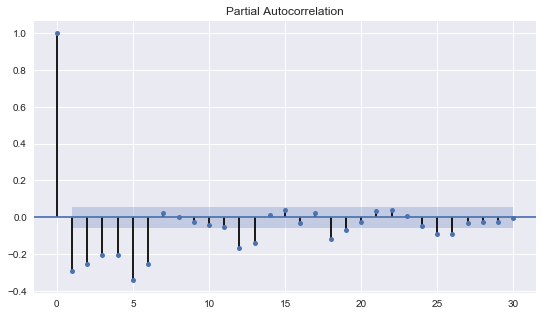

In [70]:
# Set figure/axes.
fig, ax = plt.subplots(figsize=(9,5))

# Generate plot.
plot_pacf(train.complaint_count.diff(1).dropna(), lags=30, ax=ax);

In [71]:
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA

In [72]:
# Instantiate model.
model = ARIMA(endog = train.complaint_count.diff(1).dropna(), # endog = Y variable
              order = (1,0,1)) # (p, d, q)

# Fit model.
arima_1_0_1 = model.fit()

# Generate predictions.
preds = arima_1_0_1.predict()

preds.head()

from sklearn.metrics import r2_score
r2_score(train.complaint_count.diff(1).dropna(), preds)

0.30322889786177565

In [73]:
import warnings
warnings.filterwarnings('ignore')

## GridSearch over Basic ARIMA Model

In [74]:
model = ARIMA(train.complaint_count, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.complaint_count   No. Observations:                 1121
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6767.443
Method:                       css-mle   S.D. of innovations            101.232
Date:                Wed, 15 May 2019   AIC                          13542.885
Time:                        12:14:05   BIC                          13562.973
Sample:                             1   HQIC                         13550.478
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0690      0.329     -0.210      0.834      -0.714       0.576
ar.L1.D.complaint_count     0.2913      0.032      9.245      0.000       0.230       0.353


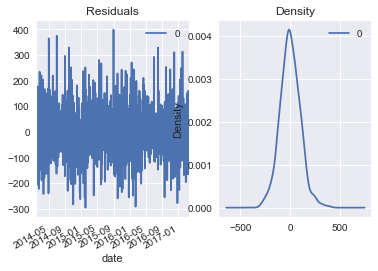

In [75]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

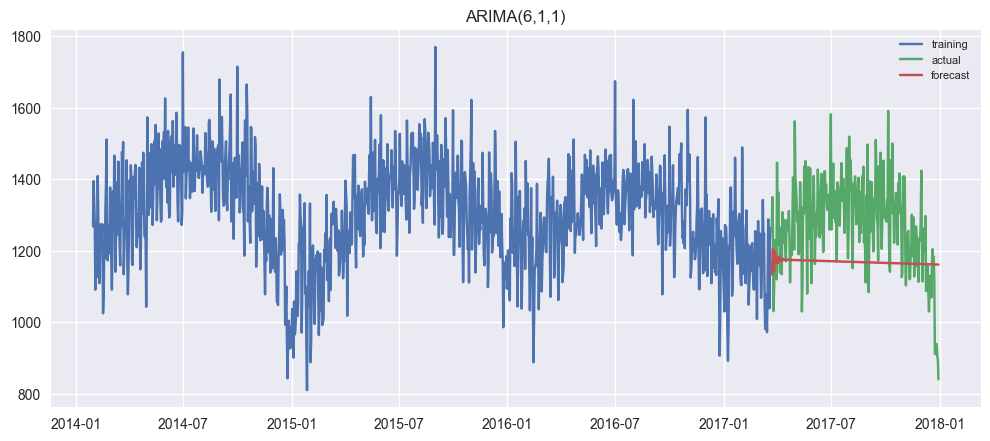

In [77]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train.complaint_count, order=(6, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(280, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.complaint_count, label='training')
plt.plot(test.complaint_count, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('ARIMA(6,1,1)')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [78]:
# Instantiate model.

# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model!

for i in range(7):
    for j in range(7):
        for k in range(1,2):
            try:
                model = ARIMA(endog = train.complaint_count.astype('float32').dropna(), # endog = Y variable
                          order = (i,j,k)) # (p, d, q) <-- talk about q later!

                # Note that we manually difference our data.
                # In the present version of statsmodels, only
                # certain values of d are supported.

                # Fit model.
                arima_0_0_0 = model.fit()

                # Generate predictions.
                preds = arima_0_0_0.predict()

                from sklearn.metrics import r2_score
                print(i, j, k, 'r2', r2_score(train.complaint_count.diff(1).dropna(), preds))
            except:
                pass


0 1 1 r2 0.25056926818679626
1 1 1 r2 0.30322889786177565
2 1 1 r2 0.30990989675694613
3 1 1 r2 0.31436053267534547
4 1 1 r2 0.321313509333339
5 1 1 r2 0.34011326025806465
6 1 1 r2 0.35145690403051644


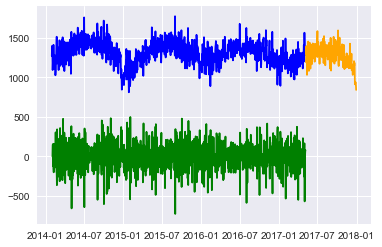

In [63]:
plt.plot(train.complaint_count, color = 'blue', label='Train')
plt.plot(test.complaint_count, color = 'orange', label='Test')
plt.plot(preds, color = 'green', label='Predictions')

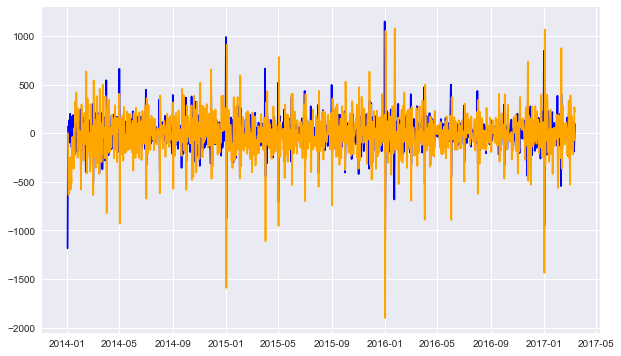

In [417]:
# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train.complaint_count.diff(1).dropna(), color = 'blue')
plt.plot(preds, color = 'orange')
#plt.title(label = 'Bus Ridership with ARIMA(1,4,0) Predictions', fontsize=18)
plt.show();

## Grid Search over SARIMA Model, No Exogenous Feature

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [81]:
# # Starting MSE and (P, D, Q).
# mse = 99 * (10 ** 50)
# final_p = 0
# final_d = 0
# final_q = 0
# final_P = 0
# final_D = 0
# final_Q = 0
# final_S = 0


# for p in [0,1,5]:
#     for d in range(2):
#         for q in [0,1,3]:
#             for P in range(3):
#                 for Q in range(3):
#                     for D in range(3):
#                         for S in [0,1,7]:
#                             try:
#                                 sarima = SARIMAX(endog = train.complaint_count,
#                                                  order = (p, d, q),              # (p, d, q)
#                                                  seasonal_order = (P, D, Q, S),
#                                                  random_state=42) # (P, D, Q, S)


#                                 # Fit SARIMA model.
#                                 model = sarima.fit()

#                                 # Generate predictions based on test set.
#                                 # Start at time period 91 and end at 113.
#                                 preds = model.predict(start=1168, end=1459)

#                                 # Evaluate predictions.
#                                 ##print(f'The MSE for ({p},{d},{q})x({P},{D},{Q},{S}) is: {mean_squared_error(test.complaint_count, preds)}')

#                                 # Save for final report.
#                                 if mse > mean_squared_error(test.complaint_count, preds):
#                                     mse = mean_squared_error(test.complaint_count, preds)
#                                     final_p = p
#                                     final_d = d
#                                     final_q = q
#                                     final_P = P
#                                     final_D = D
#                                     final_Q = Q
#                                     final_S = S

#                             except:
#                                 pass

# # Evaluate predictions.
# print(f'Our model that minimizes MSE on the test data is the SARIMA({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},{final_S}).')
# print(f'This model has an MSE of {mse}.')

# # Plot data.
# # plt.figure(figsize=(10,6))
# # plt.plot(train.complaint_count, color = 'blue', label='Train')
# # plt.plot(test.complaint_count, color = 'orange', label='Test')
# # plt.plot(preds, color = 'green', label='Predictions')
# # plt.title(label = f'Daily Crime Volume with SARIMA({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},{final_S}) Predictions', fontsize=16)
# # plt.legend()
# # plt.show();

Our model that minimizes MSE on the test data is the SARIMA(0, 0, 0)x(0,0,0,0).
This model has an MSE of 9900000000000000000000000000000000000000000000000000.


The GridSearch identified SARIMA(5, 0, 0)x(2,0,2,7) as the model that minimizes MSE on the test data. This model has an MSE of 20286.112767837218.

In [85]:
len(train)+len(test)

1402

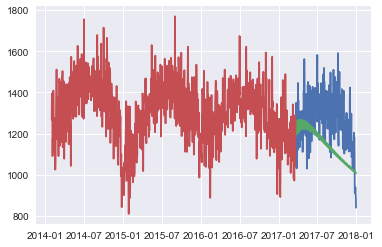

In [127]:
test['nindex'] = [i + 1122 for i in range(len(test))]
test.head()
preds_df = pd.DataFrame(preds)
preds_plotting = pd.merge(test, preds_df, how='left', left_on='nindex', right_on=preds_df.index, left_index=True)
preds_plotting.columns = preds_plotting.columns.astype('str')
preds_plotting = preds_plotting.rename(columns={'0':'preds'})
preds_plotting.index = test.index
plt.plot(preds_plotting.preds)


RMSE: 182.47175084145778


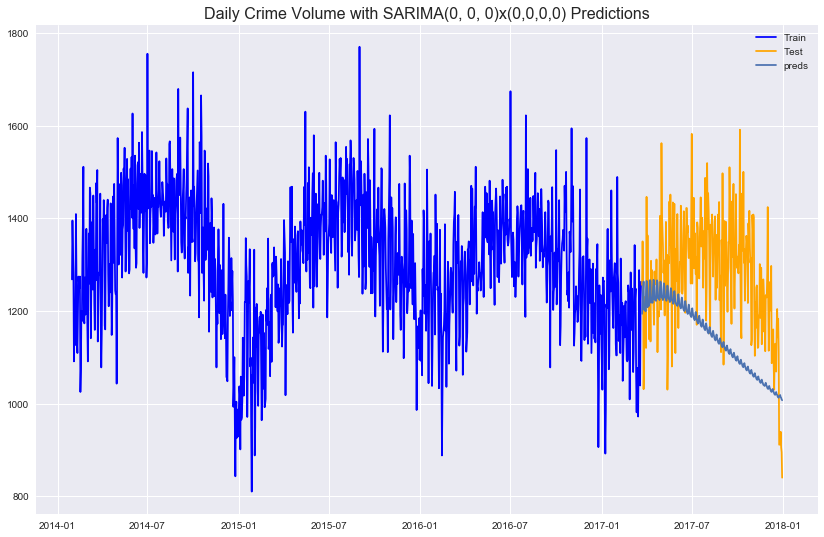

In [129]:
# Instantiate SARIMA model.
sarima = SARIMAX(endog = train.complaint_count,
                 order = (5, 0, 0),              # (p, d, q)
                 seasonal_order = (2, 0, 2, 7), # (P, D, Q, S)
                 random_state=42)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on training set.
# Start at time period  and end at .
preds = model.predict(start=1122, end=1401)
                     )

# Evaluate predictions.
print(f'RMSE: {np.sqrt(mean_squared_error(test.complaint_count, preds))}')

# Plot data.
plt.figure(figsize=(14,9))
plt.plot(train.complaint_count, color = 'blue', label='Train')
plt.plot(test.complaint_count, color = 'orange', label='Test')


# coerce preds into the same shape so they can be plotted
preds_df = pd.DataFrame(preds)
preds_plotting = pd.merge(test, preds_df, how='left', left_on='nindex', right_on=preds_df.index, left_index=True)
preds_plotting.columns = preds_plotting.columns.astype('str')
preds_plotting = preds_plotting.rename(columns={'0':'preds'})
preds_plotting.index = test.index
plt.plot(preds_plotting.preds)

plt.title(label = f'Daily Crime Volume with SARIMA({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},{final_S}) Predictions', fontsize=16)
plt.legend()
plt.show();

## Grid Search over SARIMA Model, With Exogenous Feature

In [134]:
# # Starting MSE and (P, D, Q).
# mse = 99 * (10 ** 50)
# final_p = 0
# final_d = 0
# final_q = 0
# final_P = 0
# final_D = 0
# final_Q = 0
# final_S = 0


# for p in [1,5]:
#     for d in range(2):
#         for q in [0,1,3]:
#             for P in range(3):
#                 for Q in range(3):
#                     for D in range(3):
#                         for S in [0,1, 7]:
#                             try:
#                                 # Instantiate SARIMAX model.
#                                 sarima = SARIMAX(endog = train.complaint_count,
#                                                  order = (p, d, q),              # (p, d, q)
#                                                  seasonal_order = (P, D, Q, S), # (P, D, Q, S)
#                                                  exog = train['max_temp'],
#                                                  random_state=42)

#                                 # Fit SARIMA model.
#                                 model = sarima.fit()

#                                 # Generate predictions based on training set.
#                                 # Start at time period  and end at .
#                                 preds = model.predict(start=1122, end=1401, exog = test[['max_temp']])

#                                 # Evaluate predictions.
#                                 ##print(f'The MSE for ({p},{d},{q})x({P},{D},{Q},{S}) is: {mean_squared_error(test.complaint_count, preds)}')

#                                 # Save for final report.
#                                 if mse > mean_squared_error(test.complaint_count, preds):
#                                     mse = mean_squared_error(test.complaint_count, preds)
#                                     final_p = p
#                                     final_d = d
#                                     final_q = q
#                                     final_P = P
#                                     final_D = D
#                                     final_Q = Q
#                                     final_S = S

#                             except:
#                                 pass

# print(f'Our model that minimizes MSE on the test data is the SARIMA({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},{final_S}).')
# print(f'This model has an MSE of {mse}.')

# # # Plot data.
# # plt.figure(figsize=(10,6))
# # plt.plot(train.complaint_count, color = 'blue', label='Train')
# # plt.plot(test.complaint_count, color = 'orange', label='Test')
# # plt.plot(preds, color = 'green', label='Predictions')
# # plt.title(label = f'Daily Crime Volume with SARIMA({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},{final_S}) Predictions', fontsize=16)
# # plt.legend()
# # plt.show();

Our model that minimizes MSE on the test data is the SARIMA(5, 1, 1)x(0,1,2,7).
This model has an MSE of 7190.88552510291.


The GridSearch identified SARIMAX(5,1,1)x(0,1,2,7) as the model that minimizes MSE on the test data, producing an MSE of 7190.8855251029.

RMSE: 84.7990891761398


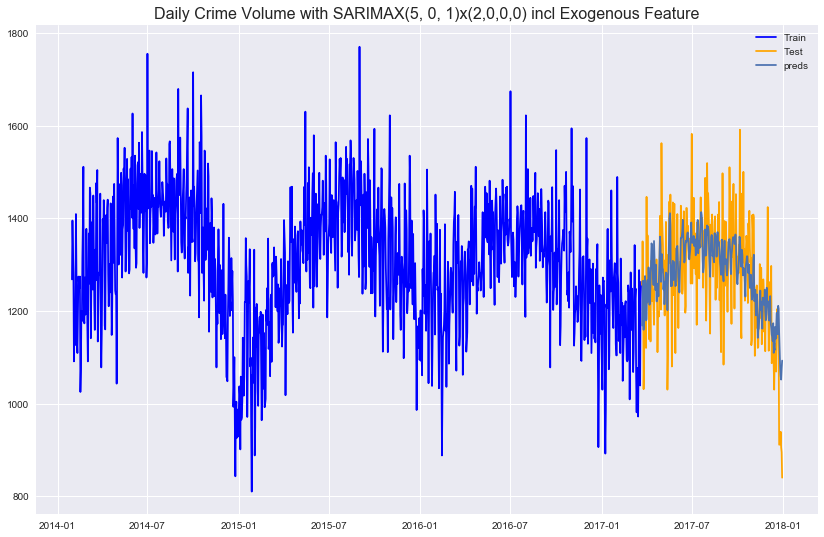

In [135]:
# Instantiate SARIMA model.
sarima = SARIMAX(endog = train.complaint_count,
                 order = (5, 1, 1),              # (p, d, q)
                 seasonal_order = (0, 1, 2, 7), # (P, D, Q, S)
                 exog = train['max_temp'],
                 random_state=22)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on training set.
# Start at time period  and end at .
preds = model.predict(start=1122, end=1401, exog = test[['max_temp']])

# Evaluate predictions.
print(f'RMSE: {np.sqrt(mean_squared_error(test.complaint_count, preds))}')

# Plot data.
plt.figure(figsize=(14,9))
plt.plot(train.complaint_count, color = 'blue', label='Train')
plt.plot(test.complaint_count, color = 'orange', label='Test')

# coerce preds into the same shape so they can be plotted
preds_df = pd.DataFrame(preds)
preds_plotting = pd.merge(test, preds_df, how='left', left_on='nindex', right_on=preds_df.index, left_index=True)
preds_plotting.columns = preds_plotting.columns.astype('str')
preds_plotting = preds_plotting.rename(columns={'0':'preds'})
preds_plotting.index = test.index
plt.plot(preds_plotting.preds)

plt.title(label = f'Daily Crime Volume with SARIMAX(5, 1, 1)x(0,1,2,7) incl Exogenous Feature', fontsize=16)
plt.legend()
plt.show();

In [413]:
model.summary()

ZeroDivisionError: division by zero

## RNNs

In [494]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, SimpleRNN, Flatten, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
%matplotlib inline


In [495]:
df = date_crime_temp[['complaint_count', 'max_temp']]
df.head()

,complaint_count,max_temp
date,,
2014-01-01,2281,33
2014-01-02,1098,33
2014-01-03,974,18
2014-01-04,1049,29
2014-01-05,1017,40


In [496]:
df.isnull().sum()

complaint_count    0
max_temp           0
dtype: int64

In [497]:
df.dropna(inplace=True)

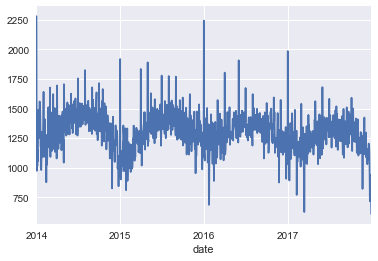

In [498]:
df.complaint_count.plot()

In [499]:
df['target'] = df.complaint_count

In [500]:
df.head()

,complaint_count,max_temp,target
date,,,
2014-01-01,2281,33,2281
2014-01-02,1098,33,1098
2014-01-03,974,18,974
2014-01-04,1049,29,1049
2014-01-05,1017,40,1017


In [505]:
X = df[['complaint_count']]
y = df['target']

In [506]:
np.mean(y)

1301.6016427104723

In [507]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_test.head()

,complaint_count
date,
2016-12-31,1138
2017-01-01,1986
2017-01-02,1030
2017-01-03,1272
2017-01-04,1263


In [508]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [509]:
np.mean(y_test)

1254.9371584699454

In [510]:
length = 7
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=length, batch_size=32)
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=length, batch_size=32)

In [512]:
model = Sequential()
model.add(LSTM(32, input_shape=(train_sequences.length, 1), return_sequences=True))
model.add(GRU(64))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(lr=.001), 
              loss='mse', 
              metrics=['mse'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

history = model.fit_generator(train_sequences, 
                              validation_data=test_sequences, 
                              epochs=90, 
                              verbose=2)

Epoch 1/90
 - 14s - loss: 1759479.3051 - mean_squared_error: 1759479.3051 - val_loss: 1590824.9189 - val_mean_squared_error: 1590824.9189
Epoch 2/90
 - 1s - loss: 1747683.7022 - mean_squared_error: 1747683.7022 - val_loss: 1571867.9302 - val_mean_squared_error: 1571867.9302
Epoch 3/90
 - 1s - loss: 1734781.7279 - mean_squared_error: 1734781.7279 - val_loss: 1564323.2352 - val_mean_squared_error: 1564323.2352
Epoch 4/90
 - 1s - loss: 1726919.7059 - mean_squared_error: 1726919.7059 - val_loss: 1556730.3567 - val_mean_squared_error: 1556730.3567
Epoch 5/90
 - 1s - loss: 1718753.3787 - mean_squared_error: 1718753.3787 - val_loss: 1548818.7730 - val_mean_squared_error: 1548818.7730
Epoch 6/90
 - 1s - loss: 1710094.5257 - mean_squared_error: 1710094.5257 - val_loss: 1540269.8694 - val_mean_squared_error: 1540269.8694
Epoch 7/90
 - 1s - loss: 1700813.2647 - mean_squared_error: 1700813.2647 - val_loss: 1531053.5087 - val_mean_squared_error: 1531053.5087
Epoch 8/90
 - 1s - loss: 1690811.5809 - 

 - 1s - loss: 568467.6682 - mean_squared_error: 568467.6682 - val_loss: 464764.2064 - val_mean_squared_error: 464764.2064
Epoch 62/90
 - 1s - loss: 547568.8713 - mean_squared_error: 547568.8713 - val_loss: 446005.6173 - val_mean_squared_error: 446005.6173
Epoch 63/90
 - 1s - loss: 527117.1664 - mean_squared_error: 527117.1664 - val_loss: 427519.5059 - val_mean_squared_error: 427519.5059
Epoch 64/90
 - 1s - loss: 506983.2215 - mean_squared_error: 506983.2215 - val_loss: 409525.4926 - val_mean_squared_error: 409525.4926
Epoch 65/90
 - 1s - loss: 487380.7192 - mean_squared_error: 487380.7192 - val_loss: 391654.5654 - val_mean_squared_error: 391654.5654
Epoch 66/90
 - 1s - loss: 467992.5074 - mean_squared_error: 467992.5074 - val_loss: 374485.4772 - val_mean_squared_error: 374485.4772
Epoch 67/90
 - 1s - loss: 449161.5947 - mean_squared_error: 449161.5947 - val_loss: 357607.3923 - val_mean_squared_error: 357607.3923
Epoch 68/90
 - 1s - loss: 430724.5630 - mean_squared_error: 430724.5630 - 

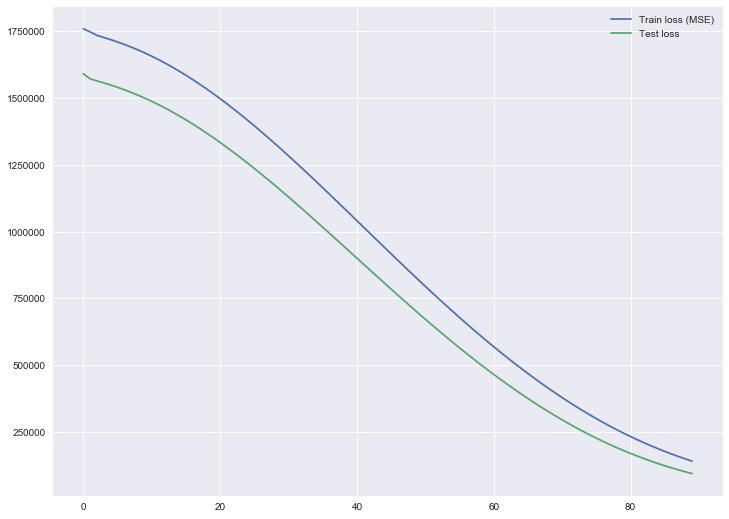

In [513]:
plt.figure(figsize=(12,9))
plt.plot(history.history['loss'], label='Train loss (MSE)')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

In [514]:
ss.scale_

array([157.04802104])

In [515]:
np.std(X_train)

complaint_count    157.048021
dtype: float64

In [527]:
g[:10]

array([[982.71576],
       [982.71454],
       [982.7146 ],
       [982.71497],
       [982.71515],
       [982.7156 ],
       [982.71564],
       [982.7157 ],
       [982.71576],
       [982.71576]], dtype=float32)

In [525]:

plt.plot(y_test)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1186f0f28> (for post_execute):


ValueError: view limit minimum -36834.700000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36834.700000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [517]:
y_test

date
2016-12-31    1138
2017-01-01    1986
2017-01-02    1030
2017-01-03    1272
2017-01-04    1263
2017-01-05    1265
2017-01-06    1202
2017-01-07     980
2017-01-08     892
2017-01-09     986
2017-01-10    1214
2017-01-11    1206
2017-01-12    1375
2017-01-13    1377
2017-01-14    1255
2017-01-15    1074
2017-01-16    1104
2017-01-17    1266
2017-01-18    1310
2017-01-19    1242
2017-01-20    1460
2017-01-21    1322
2017-01-22    1239
2017-01-23    1191
2017-01-24    1163
2017-01-25    1270
2017-01-26    1284
2017-01-27    1303
2017-01-28    1254
2017-01-29    1129
              ... 
2017-12-02    1217
2017-12-03    1114
2017-12-04    1192
2017-12-05    1262
2017-12-06    1233
2017-12-07    1201
2017-12-08    1297
2017-12-09    1087
2017-12-10    1097
2017-12-11    1093
2017-12-12    1160
2017-12-13    1080
2017-12-14    1030
2017-12-15    1103
2017-12-16    1129
2017-12-17    1129
2017-12-18    1069
2017-12-19    1166
2017-12-20    1204
2017-12-21    1143
2017-12-22    1183
2017-12

In [518]:
ss.inverse_transform(g)

array([[155650.77],
       [155650.77],
       [155650.66],
       [155650.69],
       [155650.66],
       [155650.62],
       [155650.61],
       [155650.61],
       [155650.66],
       [155650.69],
       [155650.75],
       [155650.75],
       [155650.77],
       [155650.73],
       [155650.72],
       [155650.72],
       [155650.75],
       [155650.77],
       [155650.77],
       [155650.77],
       [155650.77],
       [155650.73],
       [155650.72],
       [155650.72],
       [155650.72],
       [155650.73],
       [155650.73],
       [155650.72],
       [155650.72],
       [155650.69],
       [155650.72],
       [155650.75],
       [155650.77],
       [155650.72],
       [155650.67],
       [155650.64],
       [155650.64],
       [155650.64],
       [155650.62],
       [155650.64],
       [155650.6 ],
       [155650.64],
       [155650.64],
       [155650.62],
       [155650.66],
       [155650.67],
       [155650.69],
       [155650.66],
       [155650.66],
       [155650.66],


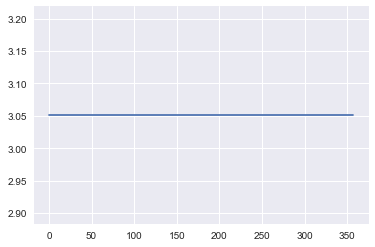

In [469]:
plt.plot(model.predict_generator(test_sequences))

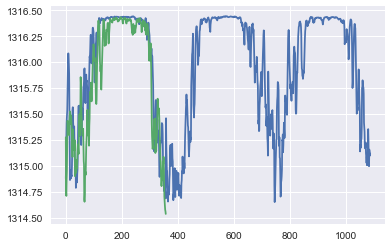

In [351]:
plt.plot(model.predict_generator(train_sequences))
plt.plot(model.predict_generator(test_sequences))

In [540]:
def generator(data, lookback, delay, min_index, max_index, shuffle = False, batch_size = 128,step = 6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size = batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [541]:
lookback = 10
step = 5
delay = 5
batch_size = 10

In [542]:
len(X_train_sc)

1095

In [543]:
train_gen = generator(X_train_sc,
                     lookback = lookback,
                     delay = delay, 
                     min_index = 0,
                     max_index = 900,
                     shuffle = True,
                     step = step,
                     batch_size = batch_size)

val_gen = generator(X_train_sc,
                     lookback = lookback,
                     delay = delay, 
                     min_index = 901,
                     max_index = 990,
                     step = step,
                     batch_size = batch_size)

test_gen = generator(X_train_sc,
                     lookback = lookback,
                     delay = delay, 
                     min_index = 991,
                     max_index = None,
                     step = step,
                     batch_size = batch_size)

In [544]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [545]:
val_steps = (990 - 901 - lookback) // batch_size
test_steps = (len(X_train_sc) - 901 - lookback) // batch_size

In [546]:
model = Sequential()
model.add(layers.GRU(32, input_shape = (None, X_train_sc.shape[-1]), return_sequences=True))
model.add(layers.GRU(128))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mse')
history = model.fit_generator(train_gen,
                             steps_per_epoch = 10,
                             epochs = 20,
                             validation_data = val_gen,
                             validation_steps = val_steps)

Epoch 1/20


IndexError: index 1 is out of bounds for axis 0 with size 1

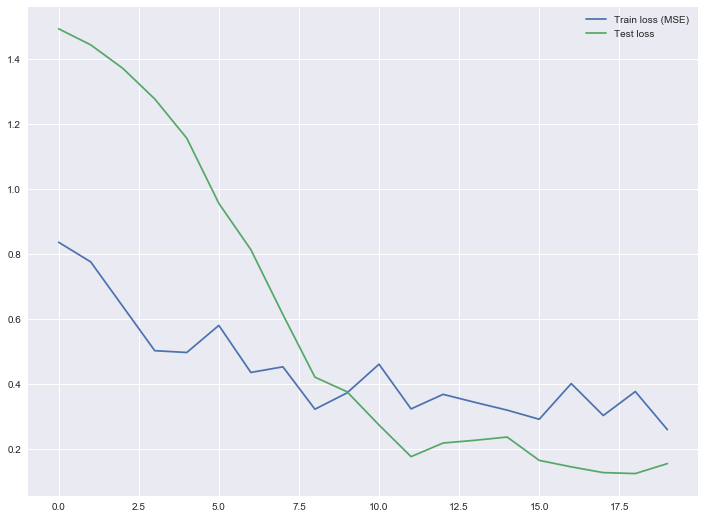

In [364]:
plt.figure(figsize=(12,9))
plt.plot(history.history['loss'], label='Train loss (MSE)')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

In [534]:
preds = model.predict_generator(test_gen, steps=5)

ValueError: Error when checking input: expected lstm_5_input to have shape (7, 1) but got array with shape (2, 2)

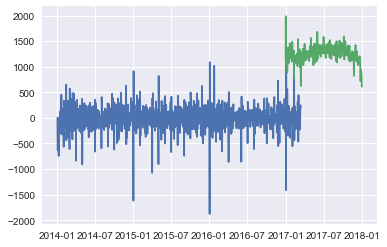

In [531]:
plt.plot(preds)
plt.plot(y_test)

In [230]:
val_gen

<generator object generator at 0x155291d58>

In [125]:
preds.shape

(358, 1)

In [505]:
list(test_sequences)

[(array([[[-1.56287704,  0.35718781],
          [ 0.18966291, -0.01625158],
          [-0.35633464, -0.26936357],
          ...,
          [-0.48886005, -0.10142196],
          [-0.21168228, -1.177881  ],
          [ 1.14987195, -0.5056204 ]],
  
         [[ 0.18966291, -0.01625158],
          [-0.35633464, -0.26936357],
          [-0.78668881, -0.79265987],
          ...,
          [-0.21168228, -1.177881  ],
          [ 1.14987195, -0.5056204 ],
          [-0.2369255 , -0.96861134]],
  
         [[-0.35633464, -0.26936357],
          [-0.78668881, -0.79265987],
          [ 0.05889133,  0.6804701 ],
          ...,
          [ 1.14987195, -0.5056204 ],
          [-0.2369255 , -0.96861134],
          [-2.03981861,  0.02542755]],
  
         ...,
  
         [[-1.01000998,  1.18764333],
          [ 0.38895189,  1.2234507 ],
          [ 1.5055799 ,  0.98256476],
          ...,
          [ 1.36088047, -1.25534332],
          [ 0.155426  ,  0.49477074],
          [-0.72583391, -0.20982063]]

In [475]:
X_train.head()

,CMPLNT_NUM,max_temp
date,,
2014-01-03,-0.115245,-0.454545
2014-01-04,0.077949,0.611111
2014-01-05,-0.031399,0.379310
2014-01-06,0.130648,0.375000
2014-01-07,-0.079062,-0.654545


In [477]:
y.head()

date
2014-01-03   -0.115245
2014-01-04    0.077949
2014-01-05   -0.031399
2014-01-06    0.130648
2014-01-07   -0.079062
Name: target, dtype: float64

In [448]:
X_train.shape, y_train.shape

((272, 2), (272,))

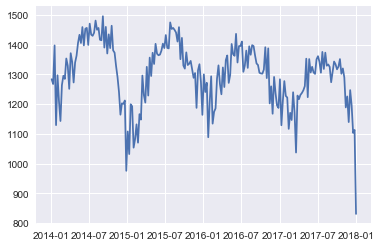

In [393]:
plt.plot(df.complaint_count.resample('W').mean())

In [390]:
weekly_average = pd.DataFrame(df.complaint_count.resample('W', level=0).mean())

## Holt Winters / Exponential Smoothing

In [142]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = date_crime_temp.complaint_count.iloc[:1122]
test = date_crime_temp.complaint_count.iloc[1123:]
holt = ExponentialSmoothing(np.asarray(train), seasonal = 'mul', seasonal_periods = 4).fit()
#predict = holt.predict(start = test.index[1], end = test.index[-1])
predict = holt.predict(start=0, end=279)

RMSE: 162.73007300459375


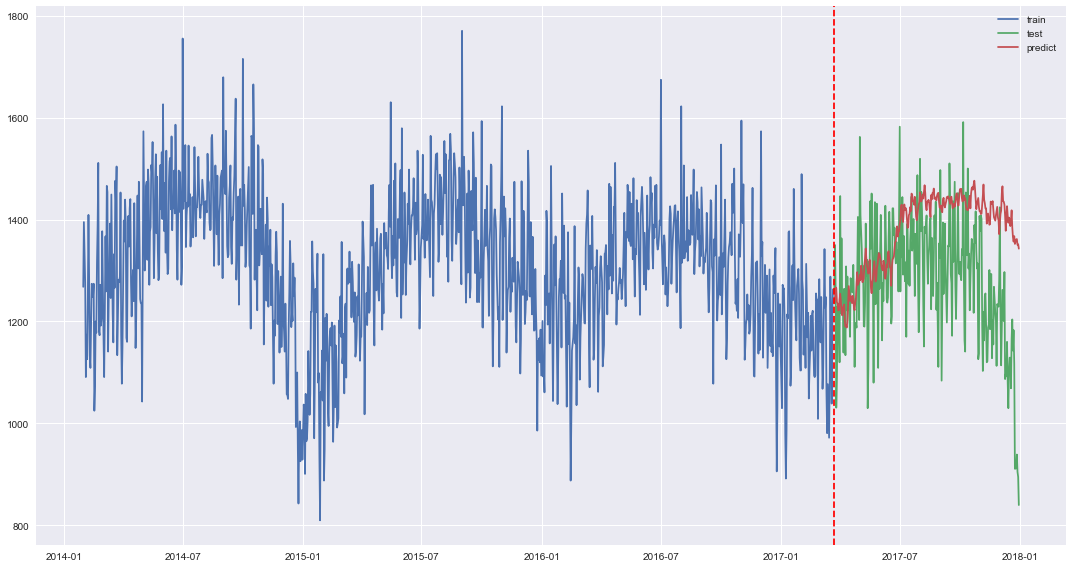

In [148]:

plt.figure(figsize = (15, 8))
plt.plot(train.index, train, label = 'train')
plt.plot(test.index, test, label = 'test')
plt.plot(test.index, predict, label = 'predict')
plt.axvline( test.index[0], color = 'red', linestyle = '--')
plt.legend()
plt.tight_layout()
print(f'RMSE: {np.sqrt(mean_squared_error(test, predict))}')

In [147]:
preds

1122    1168.383882
1123    1223.978378
1124    1265.004816
1125    1159.081176
1126    1191.702983
1127    1204.377086
1128    1275.246816
1129    1240.745034
1130    1179.486200
1131    1181.868433
1132    1247.005674
1133    1266.016976
1134    1219.710923
1135    1293.860551
1136    1243.664950
1137    1213.254049
1138    1221.357987
1139    1264.039812
1140    1313.464746
1141    1345.720710
1142    1341.344376
1143    1295.553518
1144    1278.226696
1145    1255.786367
1146    1350.820434
1147    1312.991176
1148    1279.807766
1149    1244.892812
1150    1299.443901
1151    1221.039305
           ...     
1372    1212.341769
1373    1221.053786
1374    1205.801723
1375    1184.112189
1376    1179.122634
1377    1221.804360
1378    1231.964785
1379    1172.605195
1380    1163.866423
1381    1148.614360
1382    1144.375614
1383    1135.023363
1384    1173.342391
1385    1109.336966
1386    1119.780529
1387    1115.404455
1388    1165.592847
1389    1139.540616
1390    1160.727244
